In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The shape of the mitbih_train is :  (87554, 188)
The shape of the mitbih_test is :  (21892, 188)
The last time value is :  1488.0


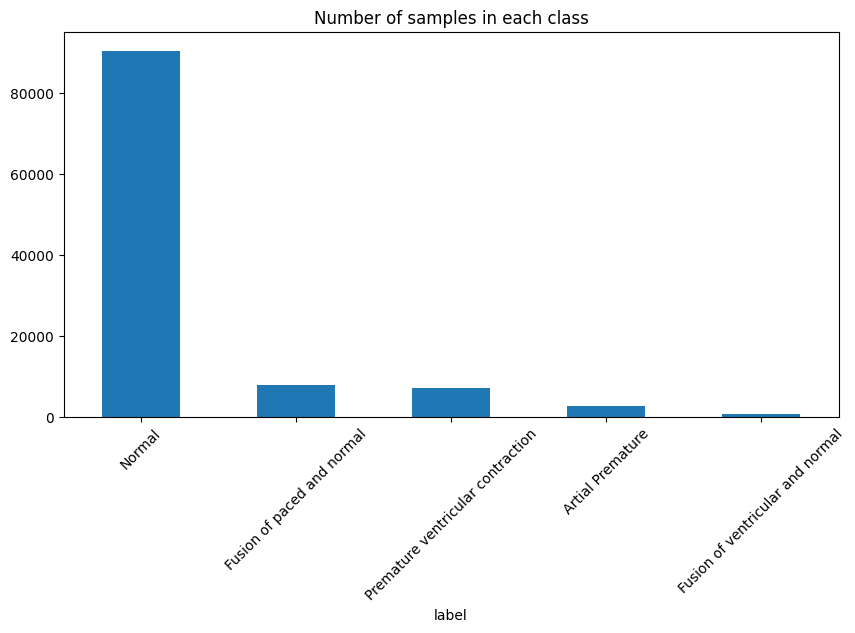

In [ ]:
df_mitbih_train = pd.read_csv("/content/mitbih_train.csv", header = None)
df_mitbih_test = pd.read_csv("/content/mitbih_test.csv", header = None)

# print shapes of the dataframes
print("The shape of the mitbih_train is : ", df_mitbih_train.shape)
print("The shape of the mitbih_test is : ", df_mitbih_test.shape)

df_mitbih = pd.concat([df_mitbih_train, df_mitbih_test], axis=0)
df_mitbih.rename(columns={187: 'label'}, inplace=True)

id_to_label = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}
#df_mitbih['label'] = df_mitbih.iloc[:, -1].map(id_to_label)

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = df_mitbih.shape[1] - 1
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
df_mitbih.columns = list(time) + ["label"]

# count the number of samples in each class and plot a bar chart
# change the class names to "normal" and "abnormal"
# count the number of samples in each class
counts = df_mitbih["label"].value_counts()
# substitute the class names
counts.index = counts.index.map(id_to_label)
# create a figure
plt.figure(figsize = (10, 5))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 45)
plt.title("Number of samples in each class")
plt.show()

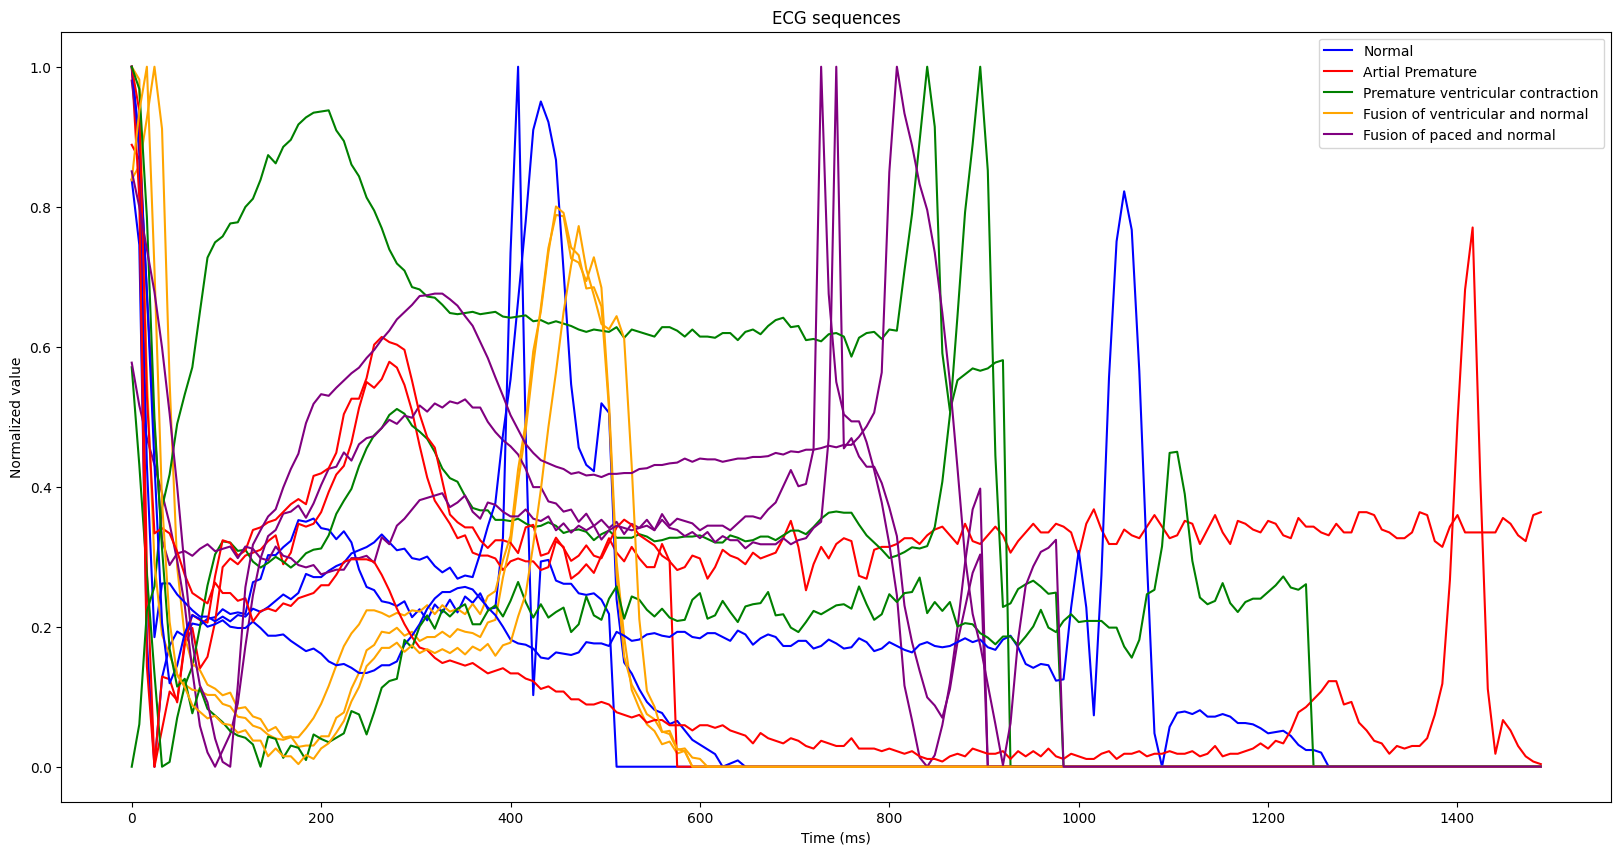

In [ ]:
# create a figure
plt.figure(figsize = (20, 10))
# define colors for each class
colors = ["blue", "red", "green", "orange", "purple"]
# plot the normal sequences
for i in range(3):
    for label in id_to_label.keys():
        # sample a random sequence from that label
        df_mitbih_label = df_mitbih[df_mitbih["label"] == label].sample(1)
        # plot the sequence
        if i == 0:
            plt.plot(df_mitbih_label.columns[:-1], df_mitbih_label.iloc[0, :-1], label = id_to_label[label], color = colors[label])
        else:
            plt.plot(df_mitbih_label.columns[:-1], df_mitbih_label.iloc[0, :-1], color = colors[label])
# create a legend for the plot, blue for normal and red for abnormal
plt.legend()
# set the title
plt.title("ECG sequences")
# y lable is "Normalized value"
plt.ylabel("Normalized value")
# x label is "Time (ms)"
plt.xlabel("Time (ms)")
# show the plot
plt.show()
# close
plt.close()

The shape of the mitbih_train is :  (87554, 188)
The shape of the mitbih_test is :  (21892, 188)
The last time value is :  1488.0


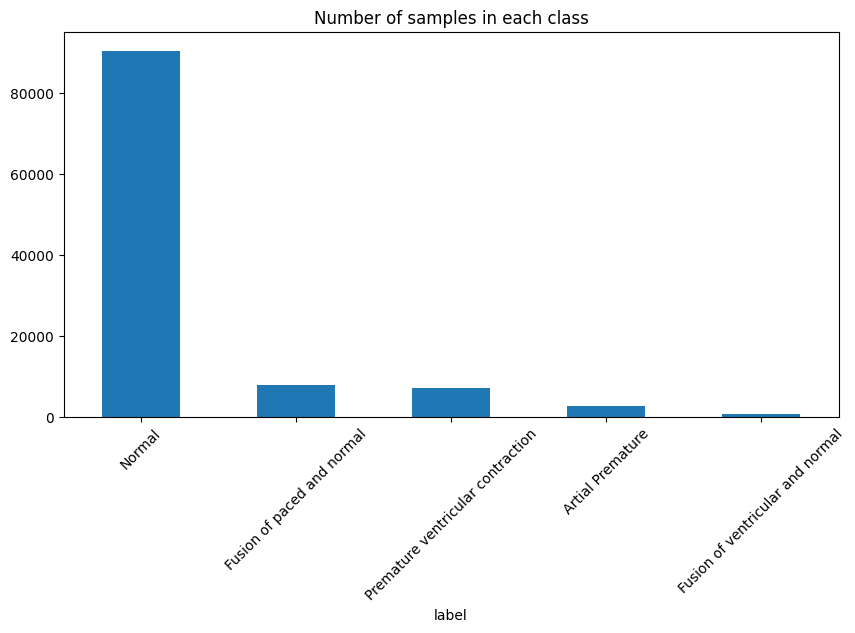

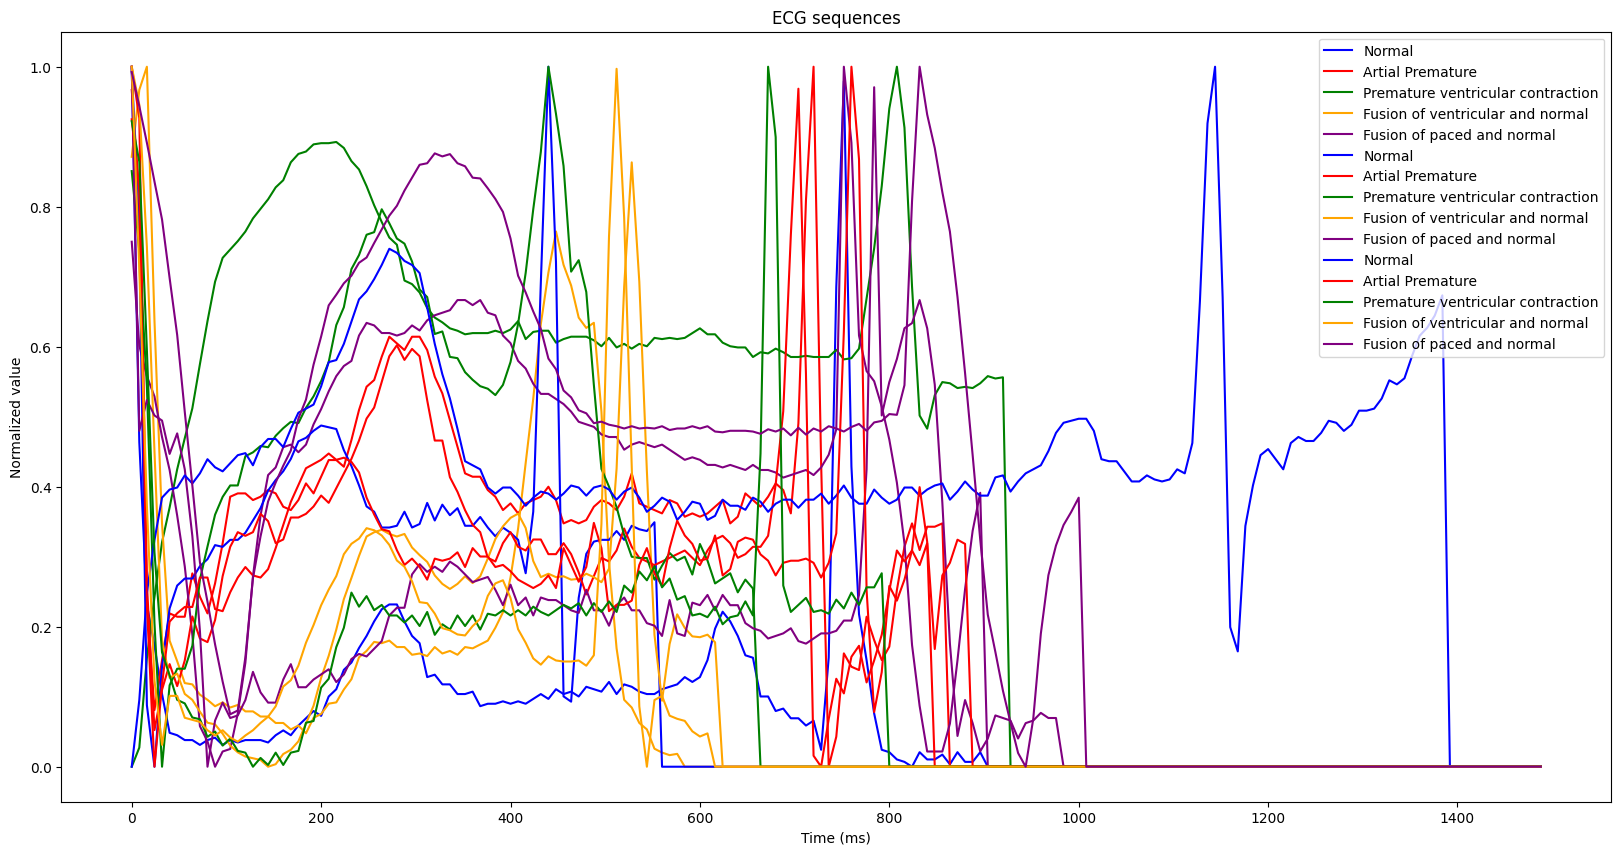

Iteration 1/1


KeyboardInterrupt: 

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load datasets
df_mitbih_train = pd.read_csv("/content/mitbih_train.csv", header=None)
df_mitbih_test = pd.read_csv("/content/mitbih_test.csv", header=None)

# Print shapes of the dataframes
print("The shape of the mitbih_train is : ", df_mitbih_train.shape)
print("The shape of the mitbih_test is : ", df_mitbih_test.shape)

# Concatenate the datasets
df_mitbih = pd.concat([df_mitbih_train, df_mitbih_test], axis=0)
df_mitbih.rename(columns={187: 'label'}, inplace=True)

# Define class names
id_to_label = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}

# Map label IDs to their names
df_mitbih['label'] = df_mitbih['label'].map(id_to_label)

# Get number of columns in the dataframe
num_cols = df_mitbih.shape[1] - 1
time = np.arange(0, num_cols) / 125 * 1000
print("The last time value is : ", time[-1])

# Set column names
df_mitbih.columns = list(time) + ["label"]

# Count the number of samples in each class and plot a bar chart
counts = df_mitbih["label"].value_counts()
counts.plot(kind="bar", figsize=(10, 5))
plt.xticks(rotation=45)
plt.title("Number of samples in each class")
plt.show()

# Plot ECG sequences
colors = ["blue", "red", "green", "orange", "purple"]
plt.figure(figsize=(20, 10))
for i in range(3):
    for label in id_to_label.keys():
        df_mitbih_label = df_mitbih[df_mitbih["label"] == id_to_label[label]].sample(1)
        plt.plot(df_mitbih_label.columns[:-1], df_mitbih_label.iloc[0, :-1], label=id_to_label[label], color=colors[label])
plt.legend()
plt.title("ECG sequences")
plt.ylabel("Normalized value")
plt.xlabel("Time (ms)")
plt.show()

# Prepare for k-fold cross-validation
X = df_mitbih.drop(columns="label")
y = df_mitbih["label"]

# Initialize k-fold cross-validation
k = 5
num_iterations = 1

# Initialize results storage
results = []

for iteration in range(num_iterations):
    print(f"Iteration {iteration + 1}/{num_iterations}")

    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=iteration)

    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train Logistic Regression model
        log_reg = LogisticRegression(max_iter=1000)
        log_reg.fit(X_train_scaled, y_train)
        y_pred_log_reg = log_reg.predict(X_test_scaled)

        # Train Random Forest model
        rf_clf = RandomForestClassifier(n_estimators=100, random_state=iteration)
        rf_clf.fit(X_train, y_train)
        y_pred_rf = rf_clf.predict(X_test)


        log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
        rf_accuracy = accuracy_score(y_test, y_pred_rf)


        fold_results = {
            'Iteration': iteration,
            'Fold': fold,
            'Logistic Regression Accuracy': log_reg_accuracy,
            'Random Forest Accuracy': rf_accuracy,
            'Actual Values': ','.join(map(str, y_test)),
            'Logistic Regression Predictions': ','.join(map(str, y_pred_log_reg)),
            'Random Forest Predictions': ','.join(map(str, y_pred_rf))
        }
        results.append(fold_results)


results_df = pd.DataFrame(results)


results_df.to_csv('mitbih_k_fold_results.csv', index=False)


print(results_df)

plt.figure(figsize=(12, 6))
for iteration in range(num_iterations):
    iteration_results = results_df[results_df['Iteration'] == iteration]
    plt.plot(iteration_results['Fold'], iteration_results['Logistic Regression Accuracy'], marker='o', label=f'Logistic Regression Iteration {iteration + 1}')
    plt.plot(iteration_results['Fold'], iteration_results['Random Forest Accuracy'], marker='o', linestyle='--', label=f'Random Forest Iteration {iteration + 1}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracies for Each Fold Across Iterations')
plt.legend()
plt.grid(True)
plt.show()


The shape of the mitbih_train is:  (87554, 188)
The shape of the mitbih_test is:  (21892, 188)
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5
   Iteration  Fold  Logistic Regression Accuracy  Random Forest Accuracy  \
0          1     1                      0.916948                0.976153   
1          2     1                      0.910366                0.974051   
2          3     1                      0.916168                0.976381   
3          4     1                      0.914797                0.974371   
4          5     1                      0.915391                0.975696   

   XGBoost Accuracy                                      Actual Values  \
0          0.980356  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....   
1          0.979990  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....   
2          0.982411  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....   
3          0.979487  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....   
4       

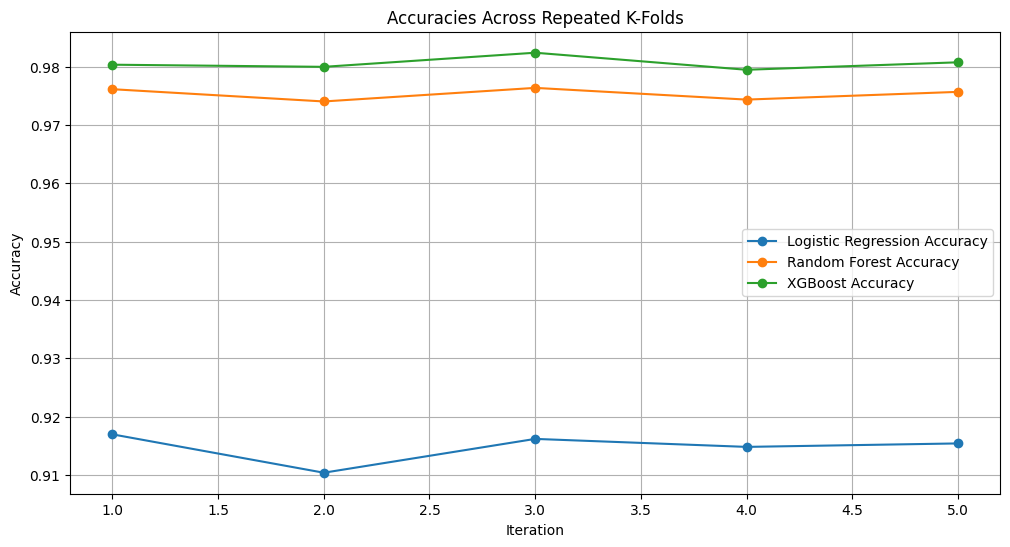

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Load datasets
df_mitbih_train = pd.read_csv("/content/mitbih_train.csv", header=None)
df_mitbih_test = pd.read_csv("/content/mitbih_test.csv", header=None)

# Print shapes of the dataframes
print("The shape of the mitbih_train is: ", df_mitbih_train.shape)
print("The shape of the mitbih_test is: ", df_mitbih_test.shape)

# Combine the dataframes
df_mitbih = pd.concat([df_mitbih_train, df_mitbih_test], axis=0)
df_mitbih.rename(columns={187: 'label'}, inplace=True)


id_to_label = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}


num_cols = df_mitbih.shape[1] - 1
time = np.arange(0, num_cols) / 125 * 1000
df_mitbih.columns = list(time) + ["label"]


X = df_mitbih.drop(columns="label")
y = df_mitbih["label"]


k = 5
n_repeats = 1
rkf = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=42)


results = []
best_model_info = {
    'model': None,
    'highest_accuracy': 0,
    'predictions': None,
    'actual_values': None,
    'iteration': None,
    'fold': None
}

#
for iteration, (train_index, test_index) in enumerate(rkf.split(X, y), 1):
    print(f"Iteration {iteration}/{n_repeats * k}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize the features for Logistic Regression
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Logistic Regression model
    log_reg = LogisticRegression(max_iter=2000)  # Increased number of iterations
    log_reg.fit(X_train_scaled, y_train)
    y_pred_log_reg = log_reg.predict(X_test_scaled)

    # Train Random Forest model
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred_rf = rf_clf.predict(X_test)

    # Train XGBoost model
    xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
    xgb_clf.fit(X_train, y_train)
    y_pred_xgb = xgb_clf.predict(X_test)

    # Compute accuracies
    log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

    # Find the best model for this iteration
    accuracies = {
        'Logistic Regression Accuracy': log_reg_accuracy,
        'Random Forest Accuracy': rf_accuracy,
        'XGBoost Accuracy': xgb_accuracy
    }

    best_model = max(accuracies, key=accuracies.get)
    best_accuracy = accuracies[best_model]

    if best_accuracy > best_model_info['highest_accuracy']:
        best_model_info['highest_accuracy'] = best_accuracy
        best_model_info['model'] = best_model
        best_model_info['iteration'] = iteration
        best_model_info['fold'] = len(results) // (n_repeats * k) + 1

        if best_model == 'Logistic Regression Accuracy':
            best_model_info['predictions'] = y_pred_log_reg
        elif best_model == 'Random Forest Accuracy':
            best_model_info['predictions'] = y_pred_rf
        elif best_model == 'XGBoost Accuracy':
            best_model_info['predictions'] = y_pred_xgb

        best_model_info['actual_values'] = y_test.values

    # Store results
    fold_results = {
        'Iteration': iteration,
        'Fold': len(results) // (n_repeats * k) + 1,
        'Logistic Regression Accuracy': log_reg_accuracy,
        'Random Forest Accuracy': rf_accuracy,
        'XGBoost Accuracy': xgb_accuracy,
        'Actual Values': ','.join(map(str, y_test.values)),
        'Logistic Regression Predictions': ','.join(map(str, y_pred_log_reg)),
        'Random Forest Predictions': ','.join(map(str, y_pred_rf)),
        'XGBoost Predictions': ','.join(map(str, y_pred_xgb))
    }
    results.append(fold_results)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('k_fold_results_with_xgboost_rkf.csv', index=False)

# Print the results DataFrame
print(results_df)


if best_model_info['model']:
    best_model_results_df = pd.DataFrame({
        'Actual Values': best_model_info['actual_values'],
        f'{best_model_info["model"]} Predictions': best_model_info['predictions']
    })
    best_model_results_df.to_csv('best_model_predictions.csv', index=False)


plt.figure(figsize=(12, 6))
for model in ['Logistic Regression Accuracy', 'Random Forest Accuracy', 'XGBoost Accuracy']:
    plt.plot(results_df['Iteration'], results_df[model], marker='o', label=model)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracies Across Repeated K-Folds')
plt.legend()
plt.grid(True)
plt.show()
